In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
##null values addressed in 'Age' column

df['Age'] = df['Age'].fillna(df['Age'].mean())

In [65]:
df['Age'].isna().sum()

0

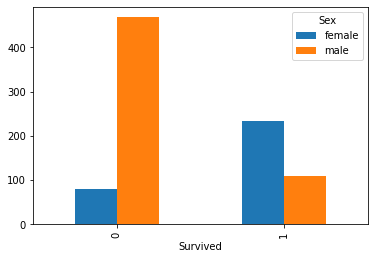

In [66]:
##survived vs sex

p1 = pd.crosstab(df.Survived,df.Sex).plot(kind='bar')
plt.show()

#females have survived more and males have lost more lives

## Pclass vs Survived

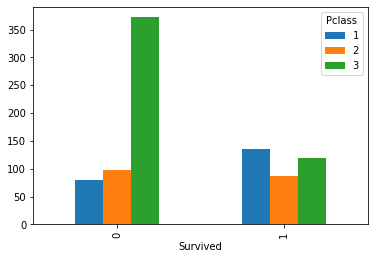

In [67]:
p2 = pd.crosstab(df.Survived, df.Pclass).plot(kind='bar')
plt.show()

##more number of deaths in third class and more number of survivals in first class

In [68]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## survived vs sibsp

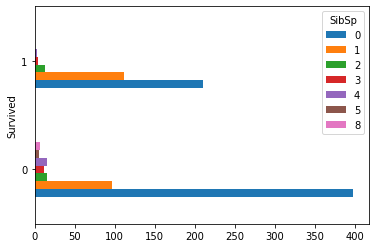

In [69]:
p3 = pd.crosstab(df.Survived, df.SibSp).plot(kind='barh')
plt.show()

## people with zero sibsp have survived more compared to other people having 1 and above sibsp

In [70]:
bins = [0,20,40,60,80]
labels = ['children','adult','senior','old age']

In [71]:
df['Age_bins'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['Age_bins']

0         adult
1         adult
2         adult
3         adult
4         adult
         ...   
886       adult
887    children
888       adult
889       adult
890       adult
Name: Age_bins, Length: 891, dtype: category
Categories (4, object): ['children' < 'adult' < 'senior' < 'old age']

## survived vs age_bins

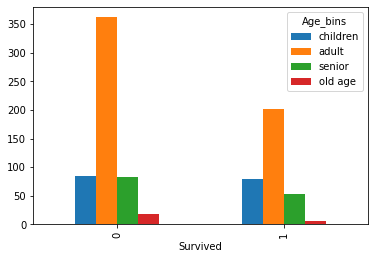

In [72]:
p4 = pd.crosstab(df['Survived'], df['Age_bins']).plot(kind='bar')
plt.show()

##more adults have died and more adults have only survived than other categories

In [73]:
df.Parch.value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [74]:
pd.get_dummies(df['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [75]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embarked = pd.get_dummies(df['Embarked'],drop_first=True)

In [76]:
df = df.drop(['Sex','Embarked','Name','Ticket'],axis=1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Age_bins
0,1,0,3,22.000000,1,0,7.2500,NaN,adult
1,2,1,1,38.000000,1,0,71.2833,C85,adult
2,3,1,3,26.000000,0,0,7.9250,NaN,adult
3,4,1,1,35.000000,1,0,53.1000,C123,adult
4,5,0,3,35.000000,0,0,8.0500,NaN,adult
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,NaN,adult
887,888,1,1,19.000000,0,0,30.0000,B42,children
888,889,0,3,29.699118,1,2,23.4500,NaN,adult
889,890,1,1,26.000000,0,0,30.0000,C148,adult


In [77]:
df = pd.concat([df,sex,embarked],axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Age_bins,male,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,adult,1,0,1
1,2,1,1,38.0,1,0,71.2833,C85,adult,0,0,0
2,3,1,3,26.0,0,0,7.9250,NaN,adult,0,0,1
3,4,1,1,35.0,1,0,53.1000,C123,adult,0,0,1
4,5,0,3,35.0,0,0,8.0500,NaN,adult,1,0,1


## building the log reg model

In [78]:
x = df.drop(['Survived','Cabin','Age_bins'],axis=1)
y = df['Survived']

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.3)

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [81]:
lr.fit(x_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
lr.predict(x_test)

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [83]:
lr.score(x_test,y_test)

0.8060897435897436